In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [2]:
def load_series(algorithm: str, upper_bound: str, task_name: str, root_dir: str):
    """
    kv_data has the following keys: 
    - 'S'
    - 'f(S)'
    - 'c(S)'
    - 'Lambda'
    - 'AF'
    """
    res = []
    # print(f"r:{root_dir}")
    for name in os.listdir(root_dir):
        # print(f"name:{name}")
        if not os.path.isdir(os.path.join(root_dir, name)):
            algo, up, task, b = name.strip()[:-5].split('-')
            # algo, up, task, b = name.strip()[:-5].split('-')
            # print(f"algo:{algo}, up:{up}, task:{task}, b:{b}, a:{algorithm}, u:{upper_bound}, t:{task_name}")
            
            if algo == algorithm and up == upper_bound and task == task_name:
                # print(name)
                file_path = os.path.join(root_dir, name)
                with open(file_path, "rb") as rd:
                    kv_data = pickle.load(rd)
                res.append( (eval(b), kv_data['f(S)'], kv_data['Lambda'], kv_data['AF']) )
    res = sorted(res, key=lambda x: x[0])
    # print(res)
    X, Y, Z, W = list(zip(*res))   # change it to two columns
    return X, Y, Z, W

def load_time_series(algorithm: str, upper_bound: str, task_name: str, root_dir: str):
    """
    kv_data has the following keys: 
    - 'S'
    - 'f(S)'
    - 'c(S)'
    - 'Lambda'
    - 'AF'
    """
    res = []
    # print(f"r:{root_dir}")
    for name in os.listdir(root_dir):
        # print(f"name:{name}")
        if not os.path.isdir(os.path.join(root_dir, name)):
            algo, up, task, b = name.strip()[:-5].split('-')
            # algo, up, task, b = name.strip()[:-5].split('-')
            # print(f"algo:{algo}, up:{up}, task:{task}, b:{b}, a:{algorithm}, u:{upper_bound}, t:{task_name}")
            
            if algo == algorithm and up == upper_bound and task == task_name:
                # print(name)
                file_path = os.path.join(root_dir, name)
                with open(file_path, "rb") as rd:
                    kv_data = pickle.load(rd)
                res.append( (eval(b), kv_data['f(S)'], kv_data['Lambda'], kv_data['Time']) )
    res = sorted(res, key=lambda x: x[0])
    # print(res)
    X, Y, Z, W = list(zip(*res))   # change it to two columns
    return X, Y, Z, W


progress:1/200
progress:2/200
progress:3/200
progress:4/200
progress:5/200
progress:6/200
progress:7/200
progress:8/200
progress:9/200
progress:10/200
progress:11/200
progress:12/200
progress:13/200
progress:14/200
progress:15/200
progress:16/200
progress:17/200
progress:18/200
progress:19/200
progress:20/200
progress:21/200
progress:22/200
progress:23/200
progress:24/200
progress:25/200
progress:26/200
progress:27/200
progress:28/200
progress:29/200
progress:30/200
progress:31/200
progress:32/200
progress:33/200
progress:34/200
progress:35/200
progress:36/200
progress:37/200
progress:38/200
progress:39/200
progress:40/200
progress:41/200
progress:42/200
progress:43/200
progress:44/200
progress:45/200
progress:46/200
progress:47/200
progress:48/200
progress:49/200
progress:50/200
progress:51/200
progress:52/200
progress:53/200
progress:54/200
progress:55/200
progress:56/200
progress:57/200
progress:58/200
progress:59/200
progress:60/200
progress:61/200
progress:62/200
progress:63/200
p

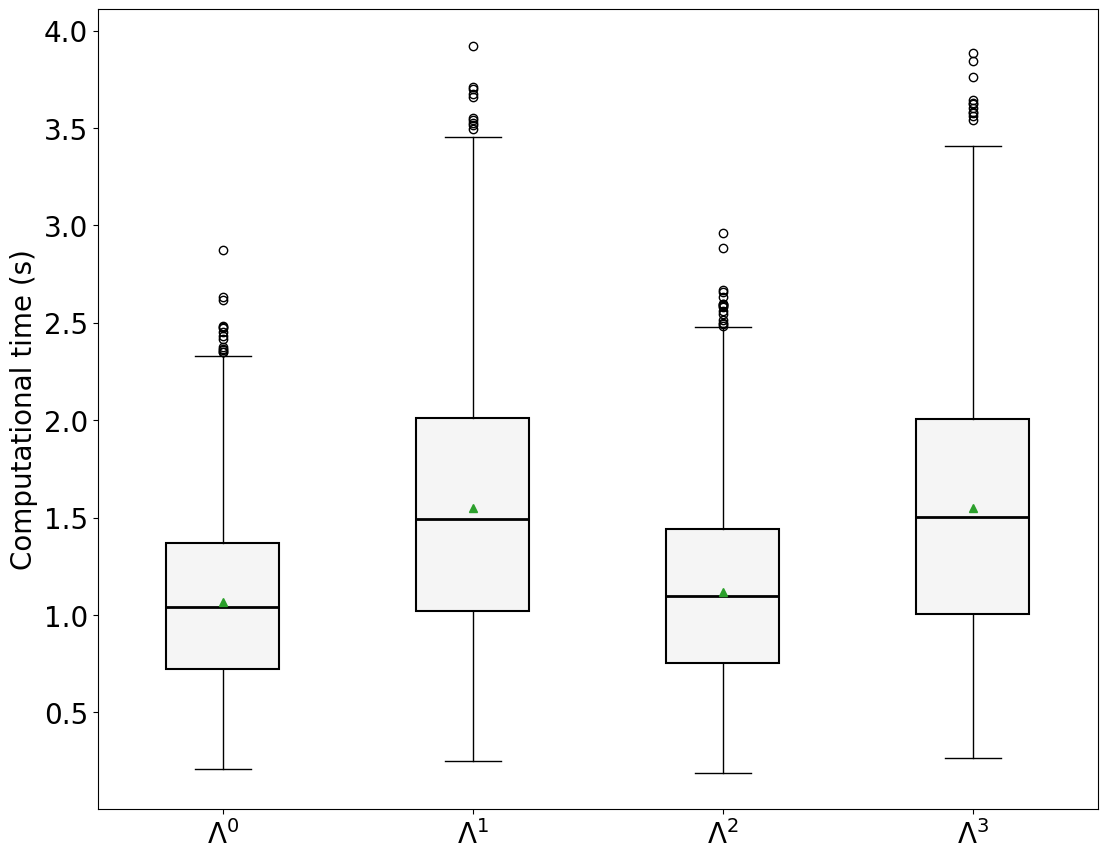

In [4]:
upper_bounds = ["ub1", "ub7", "ub7m"]
algos = ["greedy_max"]
# task_name = "FacebookGraphCoverage"
task_name = "CalTechMaximization"
# task_name = "AdultIncomeFeatureSelection"
# task_name = "YoutubeCoverage"

path_dict = {
    "FacebookGraphCoverage":"facebook",
    "YoutubeCoverage":"youtube",
    "AdultIncomeFeatureSelection":"adult",
    "CalTechMaximization":"caltech",
}

n = 50

sample = 100
suffix = f""

task2title = {
    "FacebookGraphCoverage":"ego-facebook Converage",
    "AdultIncomeFeatureSelection" : "income feature selection",
    "CalTechMaximization": "caltech maximization",
    "YoutubeCoverage": "youtube coverage",
}

n_list = []
algo = "modified_greedy" 

ub_list = [
    "ub1",
    "ub1m",
    "ub7",
    "ub7m"
]
ub_title_dict = {
    "ub1": r"$\Lambda^0$",
    "ub1m": r"$\Lambda^1$",
    "ub7": r"$\Lambda^2$",
    "ub7m":r"$\Lambda^3$",
}
ub_title_list = [ ub_title_dict[ub] for ub in ub_list]
colors = [
    "darkblue","mediumblue","blue","stateblue"
]
ub_mean_list = []
for ub in ub_list:
    ub_mean_list.append([])

seed_range = range(0, 200)

budget_range = list(range(6, 31))

for seed in seed_range:
    root_dir = os.path.join("../result/archive-5", path_dict[task_name] + suffix, f"{n}",f"{seed}")
    
    for i in range(0, len(ub_list)):
        ub = ub_list[i]
        X, Y, Z, W = load_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
        for idx in range(0, len(X)):
            b = X[idx]
            af = W[idx]
            if b in budget_range:
                ub_mean_list[i].append(af)

    print(f"progress:{seed + 1}/{200}")
    
print(f"0:{np.mean(ub_mean_list[0])},1:{np.mean(ub_mean_list[1])},2:{np.mean(ub_mean_list[2])},3:{np.mean(ub_mean_list[3])}")

data = ub_mean_list

fs = 20
plt.rcParams["font.size"] = fs

fig = plt.figure(figsize=(10, 8))

ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Approximation factor")
# ax.set_ylabel("Computational time (s)")

box_props = dict(linewidth=1.5, color="black")
median_props = dict(linewidth=2)

bp = ax.boxplot(data, patch_artist=True, showfliers=True, tick_labels=ub_title_list, showmeans=True, boxprops=box_props, medianprops=median_props)

for median in bp["medians"]:
    median.set_color("black")

for box in bp["boxes"]:
    box.set_facecolor("whitesmoke")


plt.show()

seed:0, bd:6
seed:0, bd:7
seed:0, bd:8
seed:0, bd:9
seed:0, bd:10
seed:0, bd:11
seed:0, bd:12
seed:0, bd:13
seed:0, bd:14
seed:0, bd:15
seed:0, bd:16
seed:0, bd:17
seed:0, bd:18
seed:0, bd:19
seed:0, bd:20
seed:0, bd:21
seed:0, bd:22
seed:0, bd:23
seed:0, bd:24
seed:0, bd:25
seed:0, bd:26
seed:0, bd:27
seed:0, bd:28
seed:0, bd:29
seed:0, bd:30
progress:1/200
seed:1, bd:6
seed:1, bd:7
seed:1, bd:8
seed:1, bd:9
seed:1, bd:10
seed:1, bd:11
seed:1, bd:12
seed:1, bd:13
seed:1, bd:14
seed:1, bd:15
seed:1, bd:16
seed:1, bd:17
seed:1, bd:18
seed:1, bd:19
seed:1, bd:20
seed:1, bd:21
seed:1, bd:22
seed:1, bd:23
seed:1, bd:24
seed:1, bd:25
seed:1, bd:26
seed:1, bd:27
seed:1, bd:28
seed:1, bd:29
seed:1, bd:30
progress:2/200
seed:2, bd:6
seed:2, bd:7
seed:2, bd:8
seed:2, bd:9
seed:2, bd:10
seed:2, bd:11
seed:2, bd:12
seed:2, bd:13
seed:2, bd:14
seed:2, bd:15
seed:2, bd:16
seed:2, bd:17
seed:2, bd:18
seed:2, bd:19
seed:2, bd:20
seed:2, bd:21
seed:2, bd:22
seed:2, bd:23
seed:2, bd:24
seed:2, bd:25
se

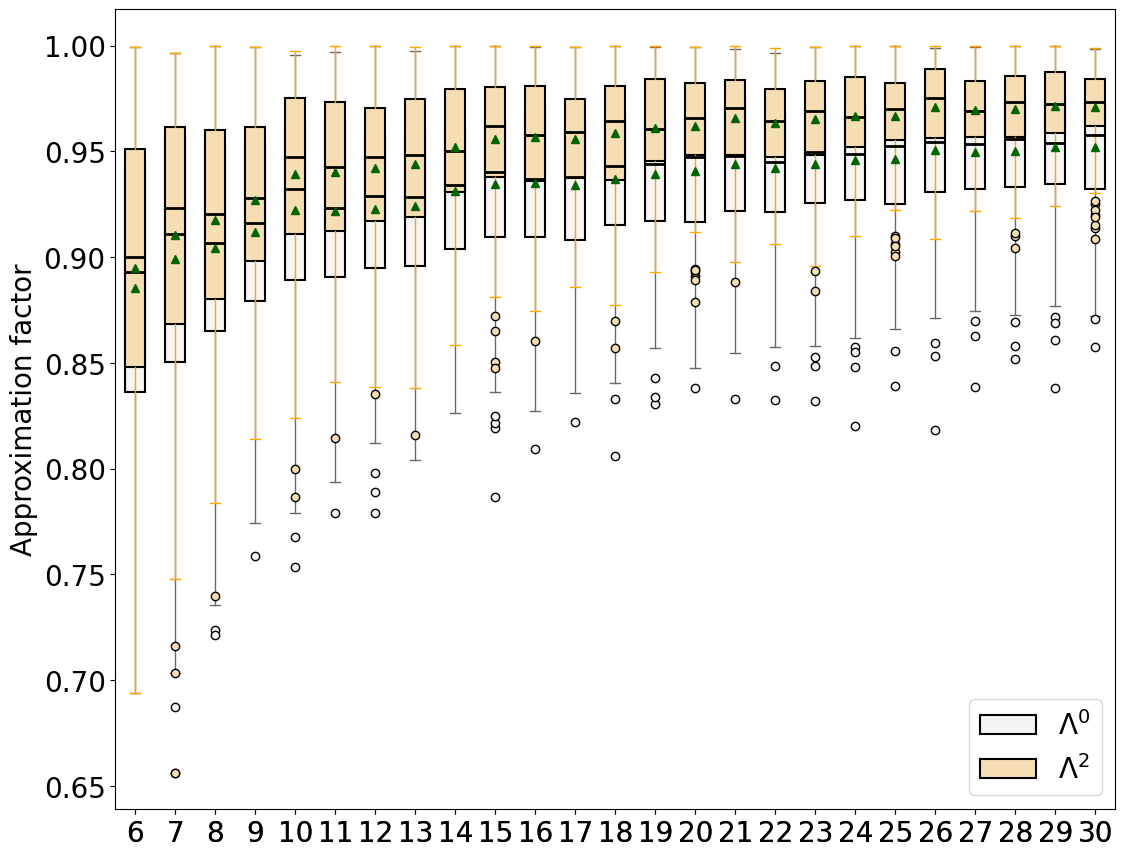

In [19]:
upper_bounds = ["ub1", "ub7"]
algos = ["greedy_max"]
# task_name = "FacebookGraphCoverage"
# task_name = "CalTechMaximization"
# task_name = "AdultIncomeFeatureSelection"
task_name = "YoutubeCoverage"

path_dict = {
    "FacebookGraphCoverage":"facebook",
    "YoutubeCoverage":"youtube",
    "AdultIncomeFeatureSelection":"adult",
    "CalTechMaximization":"caltech",
}

n = 500
start_b = 6
stop_b = 31

sample = 100
suffix = f""

task2title = {
    "FacebookGraphCoverage":"ego-facebook Converage",
    "AdultIncomeFeatureSelection" : "income feature selection",
    "CalTechMaximization": "caltech maximization",
    "YoutubeCoverage": "youtube coverage",
}

n_list = []
algo = "modified_greedy" 

ub_list = [
    "ub1",
    # "ub1m",
    "ub7",
    # "ub7m"
]

ub_title_dict = {
    "ub1": "Upper bound 0",
    "ub1m": "Upper bound 1",
    "ub7": "Upper bound 2",
    "ub7m":"Upper bound 3",
}

budget_list = list(range(start_b, stop_b))
budget_mean_list = []
for bd in budget_list:
    budget_mean_list.append([])

budget_title_list = [f"{bd}" for bd in budget_list]

colors = [
    "darkblue","mediumblue","blue","stateblue"
]
ub_mean_list = []
for ub in ub_list:
    ub_mean_list.append([])

seed_range = range(0, 200)

ubs_to_draw_list = [0, 1]

data_list = []

for ub_to_draw in ubs_to_draw_list:
    for seed in seed_range:
        root_dir = os.path.join("../result/archive-5", path_dict[task_name] + suffix, f"{n}",f"{seed}")
        
        # for i in range(0, len(ub_list)):
        ub = ub_list[ub_to_draw]
        X, Y, Z, W = load_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
        W_dict = {}
        for i in range(0, len(X)):
            budget = int(X[i])
            W_dict[budget] = W[i]

        for bd in budget_list:
            # print(f"bd:{bd}, W_dict:{W_dict.keys()}")
            print(f"seed:{seed}, bd:{bd}")
            budget_mean_list[bd - start_b].append(W_dict[bd])


        print(f"progress:{seed + 1}/{200}")
    data_list.append(budget_mean_list)
    budget_mean_list = []
    for bd in budget_list:
        budget_mean_list.append([])
    

# data = budget_mean_list

fs = 20
plt.rcParams["font.size"] = fs

fig = plt.figure(figsize=(10, 8))

ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Approximation factor")

box_props = dict(linewidth=1.5, color="black")
median_props = dict(linewidth=2)
mean_props = {"marker":"^","markerfacecolor":"darkgreen", "markeredgecolor":"darkgreen"}
flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
whisker_props = {"color":"black"}

color_list = ["whitesmoke","wheat"]

whisker_color_list = ["dimgray","orange"]

ub_label_dict = {
    "ub0":r"$\Lambda^0$",
    "ub1":r"$\Lambda^2$"
}

for i in range(0, len(data_list)):
    data = data_list[i]

    flier_props["markerfacecolor"] = color_list[i]
    whisker_props["color"] = whisker_color_list[i]

    bp = ax.boxplot(data,label=ub_label_dict[f"ub{i}"], patch_artist=True, tick_labels=budget_title_list, showmeans=True, boxprops=box_props, medianprops=median_props
                    , meanprops=mean_props, flierprops=flier_props, whiskerprops=whisker_props, capprops=whisker_props)

    for median in bp["medians"]:
        median.set_color("black")
    for box in bp["boxes"]:
        box.set_facecolor(color_list[i])

plt.legend()


plt.savefig('../foo.png')

count:1/20 caltech_50.png completed.
count:2/20 caltech_50_T.png completed.
count:3/20 caltech_b.png completed.
count:4/20 adult_50.png completed.
count:5/20 adult_50_T.png completed.
count:6/20 adult_b.png completed.
count:7/20 youtube_500.png completed.
count:8/20 youtube_500_T.png completed.
count:9/20 youtube_b.png completed.


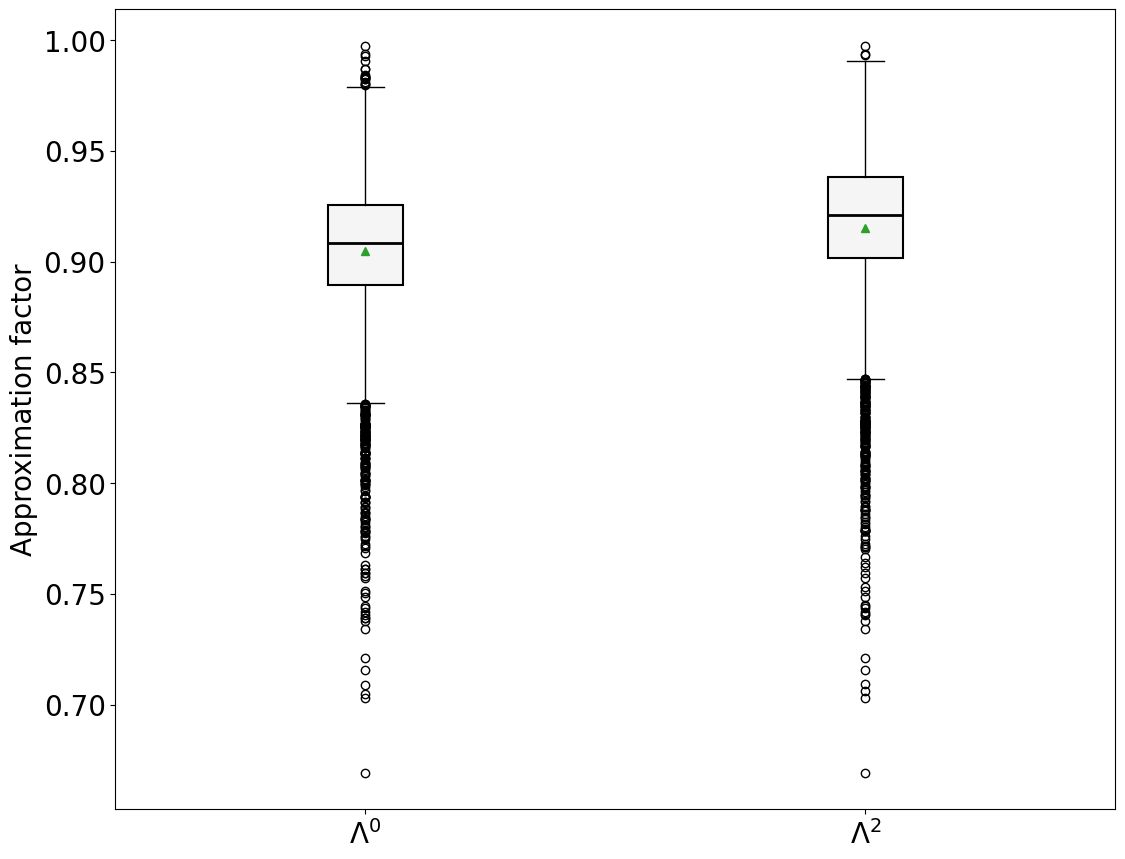

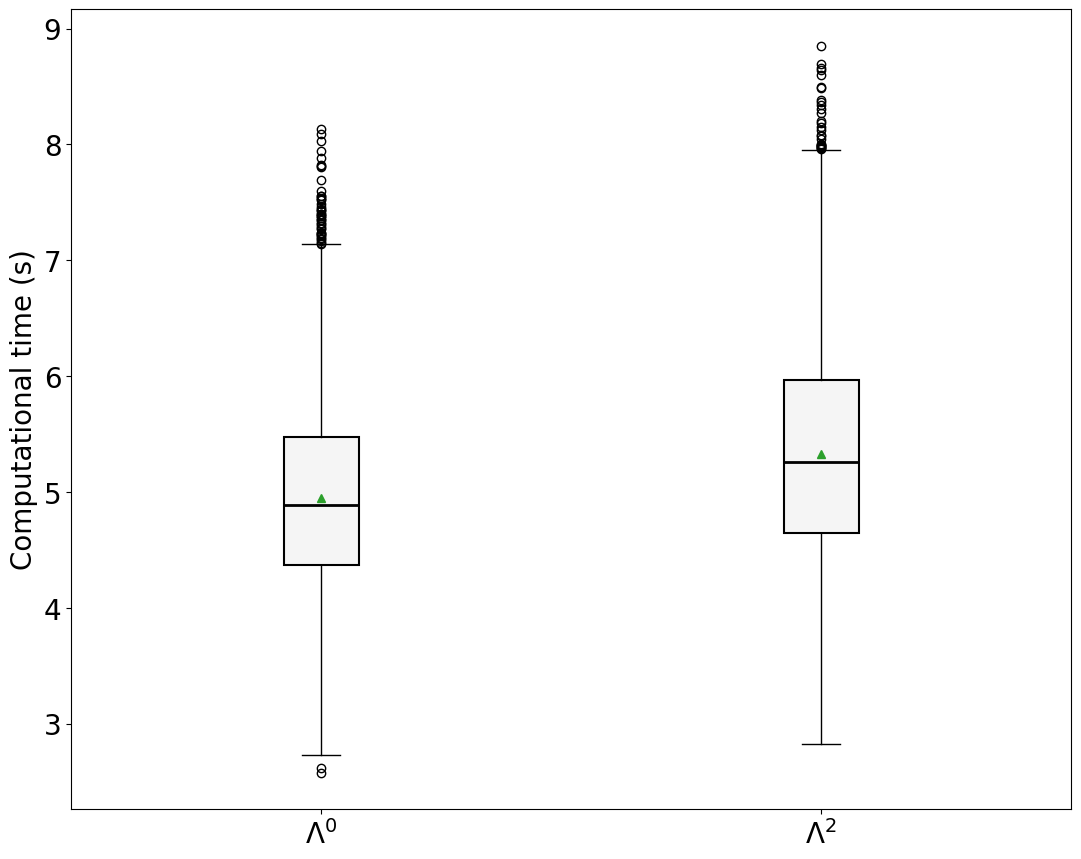

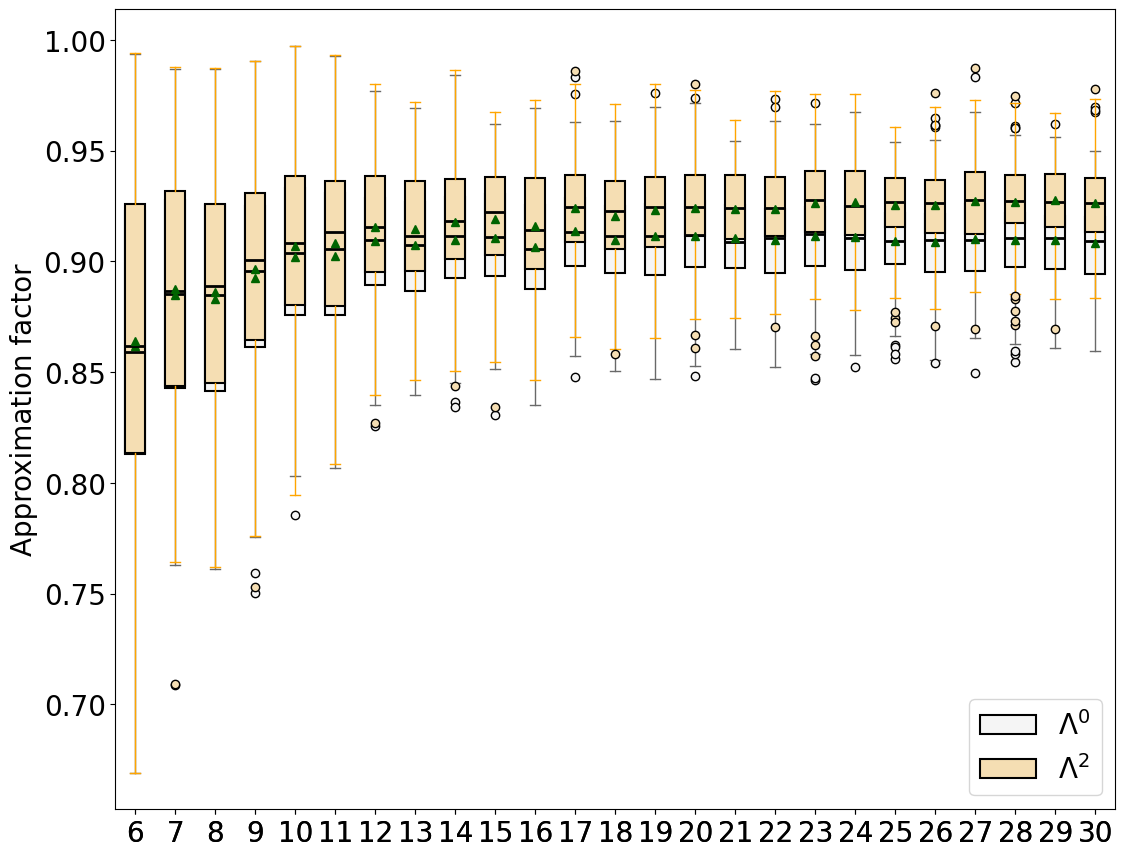

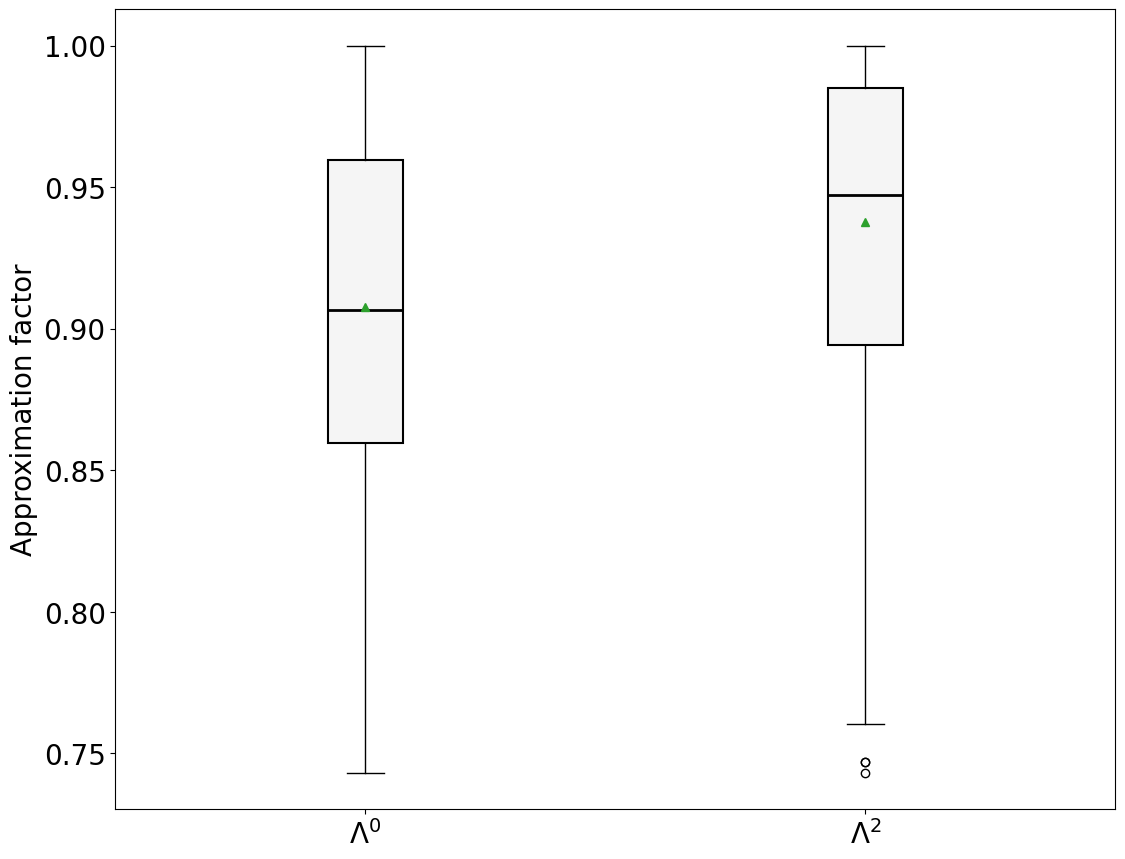

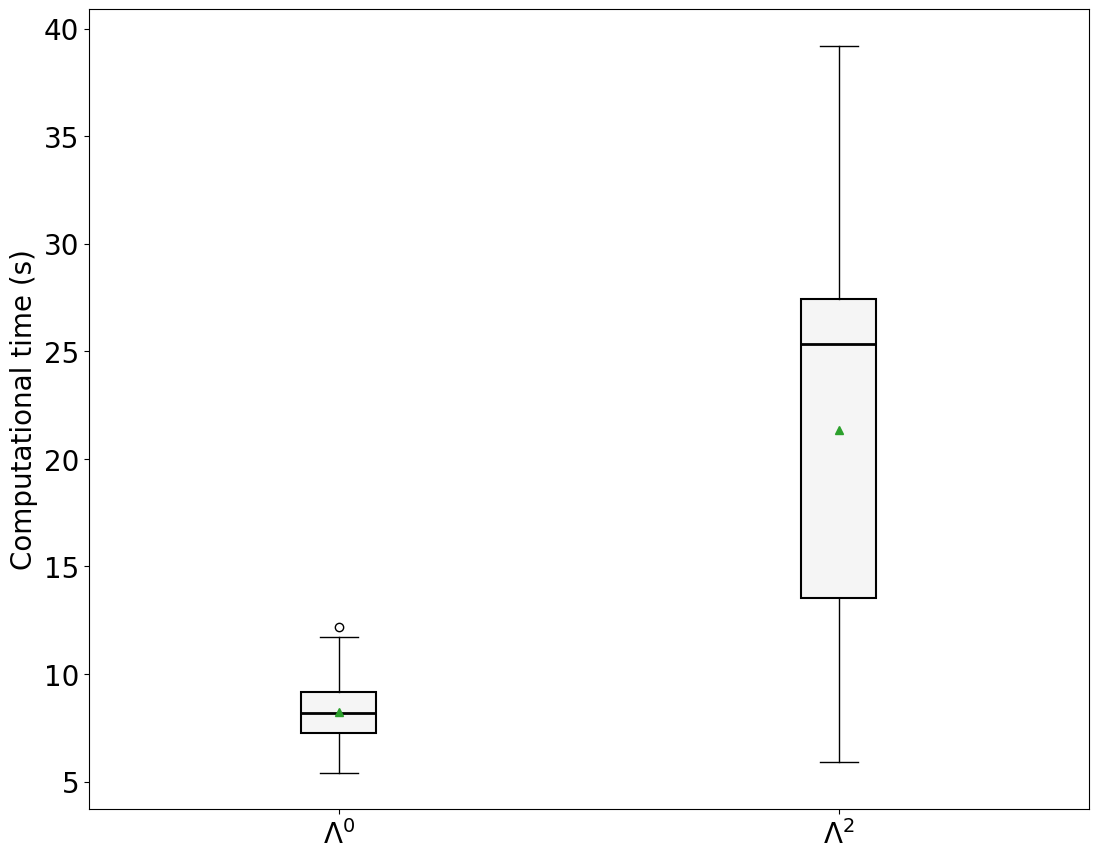

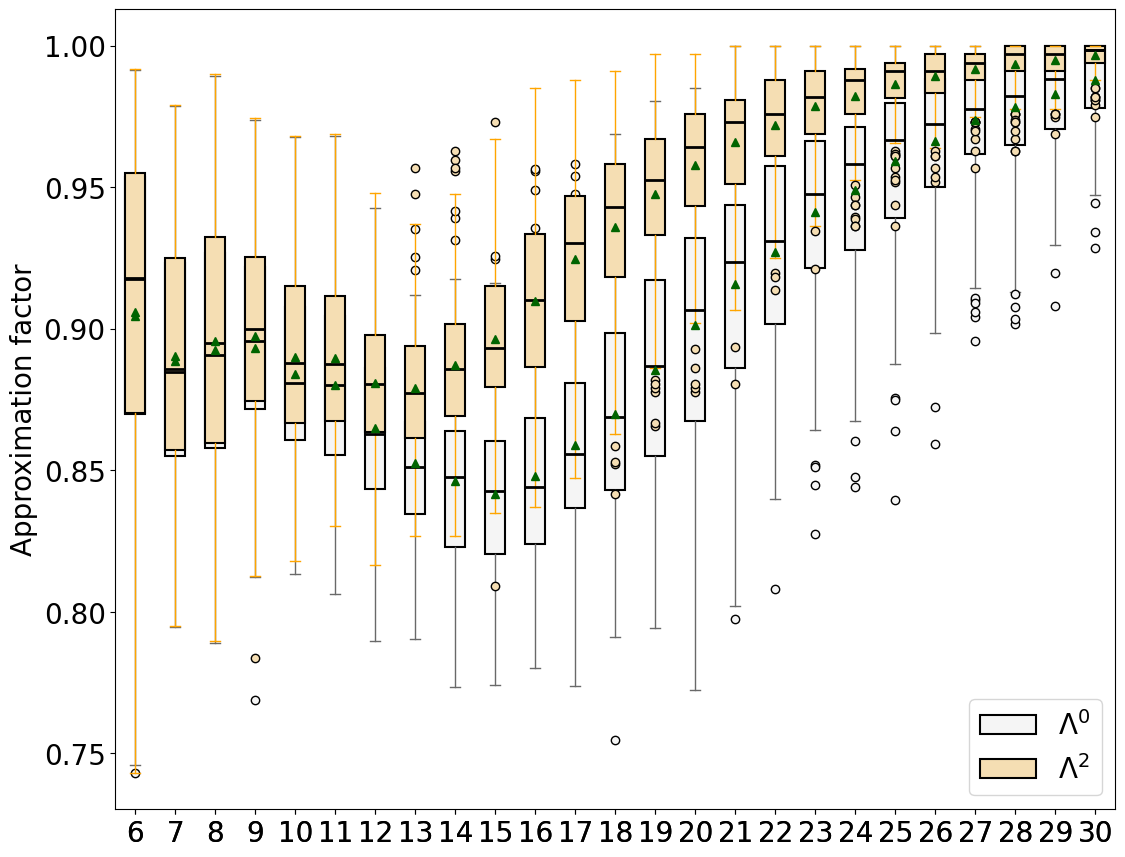

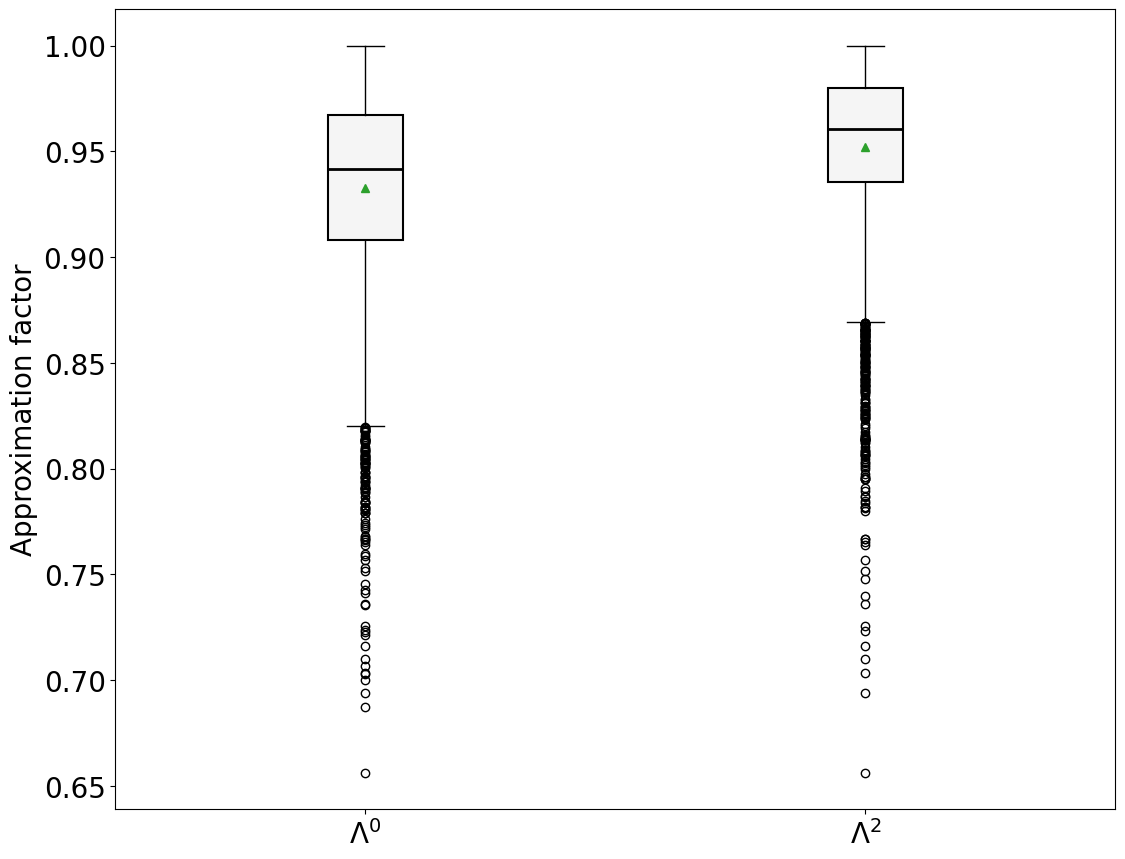

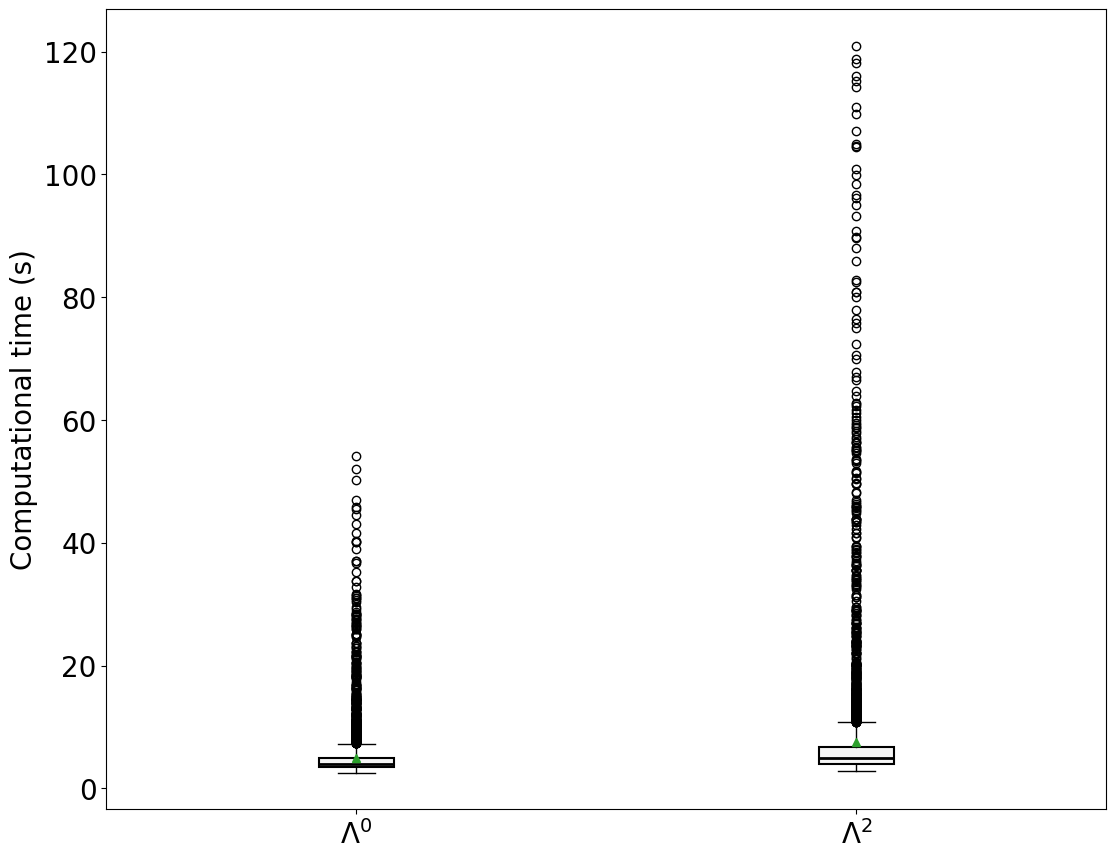

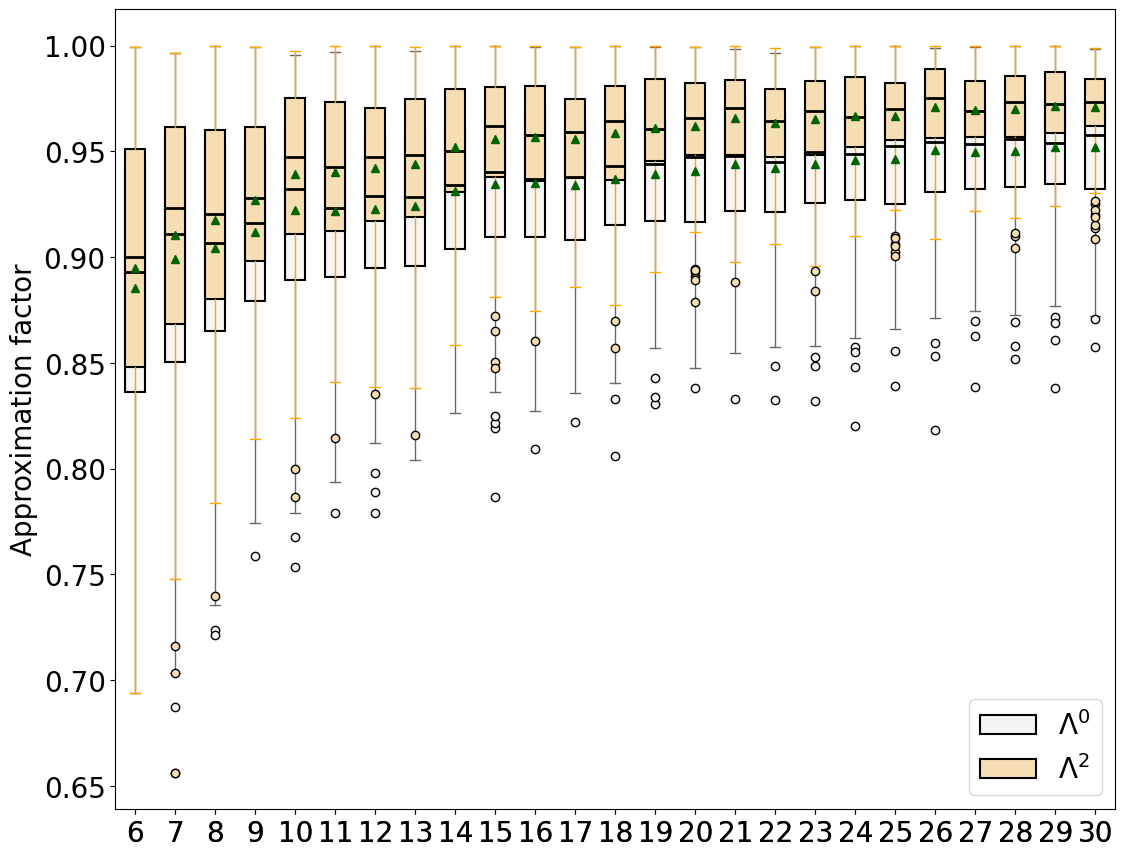

In [21]:
upper_bounds = ["ub1", "ub7"]
algos = ["greedy_max"]

tasks = [
    # "FacebookGraphCoverage",
    "CalTechMaximization",
    "AdultIncomeFeatureSelection",
    "YoutubeCoverage"
]

shortcut_dict = {
    "FacebookGraphCoverage":"facebook",
    "CalTechMaximization":"caltech",
    "AdultIncomeFeatureSelection":"adult",
    "YoutubeCoverage":"youtube"
}

sizes = [
    "small",
    # "large"
]
sizes_dict = {
    "small":{
        "FacebookGraphCoverage":500,
        "CalTechMaximization":50,
        "AdultIncomeFeatureSelection" : 50,
        "YoutubeCoverage": 500
    },
    "large":{
        "FacebookGraphCoverage":1000,
        "CalTechMaximization":100,
        "AdultIncomeFeatureSelection" : 100,
        "YoutubeCoverage": 1000
    },
}

path_dict = {
    "FacebookGraphCoverage":"facebook",
    "YoutubeCoverage":"youtube",
    "AdultIncomeFeatureSelection":"adult",
    "CalTechMaximization":"caltech",
}

task2title = {
    "FacebookGraphCoverage":"ego-facebook converage",
    "AdultIncomeFeatureSelection" : "income feature selection",
    "CalTechMaximization": "caltech maximization",
    "YoutubeCoverage": "youtube coverage",
}

cal_time = [
    False,
    True
]

output_folder = "./result-every-singleton"
archive_dir = "../result/archive-5"
b_size = "small"

count = 0

for task_name in tasks:
    for size in sizes:
        for t in cal_time:
            n = sizes_dict[size][task_name]

            sample = 100
            suffix = f""

            n_list = []
            algo = "modified_greedy" 

            ub_list = [
                "ub1",
                # "ub1m",
                "ub7",
                # "ub7m"
            ]
            ub_title_dict = {
                "ub1": r"$\Lambda^0$",
                "ub1m": r"$\Lambda^1$",
                "ub7": r"$\Lambda^2$",
                "ub7m":r"$\Lambda^3$",
            }
            ub_title_list = [ ub_title_dict[ub] for ub in ub_list]
            colors = [
                "darkblue","mediumblue","blue","stateblue"
            ]
            ub_mean_list = []
            for ub in ub_list:
                ub_mean_list.append([])

            seed_range = range(0, 200)

            budget_range = list(range(6, 31))

            for seed in seed_range:
                root_dir = os.path.join(archive_dir, path_dict[task_name] + suffix, f"{n}",f"{seed}")
                
                for i in range(0, len(ub_list)):
                    ub = ub_list[i]
                    if t:
                        X, Y, Z, W = load_time_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
                    else:
                        # print(f"t:{ub},t:{task_name},r:{root_dir}")
                        X, Y, Z, W = load_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
                    for idx in range(0, len(X)):
                        b = X[idx]
                        af = W[idx]
                        if b in budget_range:
                            ub_mean_list[i].append(af)
                
            data = ub_mean_list

            fs = 20
            plt.rcParams["font.size"] = fs

            fig = plt.figure(figsize=(10, 8))

            ax = fig.add_axes([0,0,1,1])
            if t:
                ax.set_ylabel("Computational time (s)")
            else:
                ax.set_ylabel("Approximation factor")

            box_props = dict(linewidth=1.5, color="black")
            median_props = dict(linewidth=2)

            bp = ax.boxplot(data, patch_artist=True, showfliers=True, tick_labels=ub_title_list, showmeans=True, boxprops=box_props, medianprops=median_props)

            for median in bp["medians"]:
                median.set_color("black")

            for box in bp["boxes"]:
                box.set_facecolor("whitesmoke")


            suffix = ""
            if t:
                suffix="_T"


            plt.savefig(os.path.join(output_folder, f"{shortcut_dict[task_name]}_{n}{suffix}.png"), bbox_inches='tight')
            count = count + 1
            print(f"count:{count}/20 {shortcut_dict[task_name]}_{n}{suffix}.png completed.")


    budget_list = list(range(6, 31))
    start_b = 6

    budget_mean_list = []
    for bd in budget_list:
        budget_mean_list.append([])

    budget_title_list = [f"{bd}" for bd in budget_list]

    colors = [
        "darkblue","mediumblue","blue","stateblue"
    ]
    ub_mean_list = []
    for ub in ub_list:
        ub_mean_list.append([])

    seed_range = range(0, 200)

    ubs_to_draw_list = [0, 1]

    data_list = []

    n = sizes_dict[b_size][task_name]

    for ub_to_draw in ubs_to_draw_list:
        for seed in seed_range:
            root_dir = os.path.join(archive_dir, path_dict[task_name], f"{n}",f"{seed}")
            ub = ub_list[ub_to_draw]
            X, Y, Z, W = load_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
            W_dict = {}
            for i in range(0, len(X)):
                budget = int(X[i])
                W_dict[budget] = W[i]
            for bd in budget_list:
                budget_mean_list[bd - start_b].append(W_dict[bd])
        data_list.append(budget_mean_list)
        budget_mean_list = []
        for bd in budget_list:
            budget_mean_list.append([])

    fs = 20
    plt.rcParams["font.size"] = fs

    fig = plt.figure(figsize=(10, 8))

    ax = fig.add_axes([0,0,1,1])
    ax.set_ylabel("Approximation factor")

    box_props = dict(linewidth=1.5, color="black")
    median_props = dict(linewidth=2)
    mean_props = {"marker":"^","markerfacecolor":"darkgreen", "markeredgecolor":"darkgreen"}
    flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
    flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
    whisker_props = {"color":"black"}

    color_list = ["whitesmoke","wheat"]

    whisker_color_list = ["dimgray","orange"]

    ub_label_dict = {
        "ub0":r"$\Lambda^0$",
        "ub1":r"$\Lambda^2$"
    }

    for i in range(0, len(data_list)):
        data = data_list[i]

        flier_props["markerfacecolor"] = color_list[i]
        whisker_props["color"] = whisker_color_list[i]

        bp = ax.boxplot(data,label=ub_label_dict[f"ub{i}"], patch_artist=True, tick_labels=budget_title_list, showmeans=True, boxprops=box_props, medianprops=median_props
                        , meanprops=mean_props, flierprops=flier_props, whiskerprops=whisker_props, capprops=whisker_props)

        for median in bp["medians"]:
            median.set_color("black")
        for box in bp["boxes"]:
            box.set_facecolor(color_list[i])

    plt.legend()


    plt.savefig(os.path.join(output_folder, f"{shortcut_dict[task_name]}_b.png"), bbox_inches='tight')
    count = count + 1
    print(f"count:{count}/20 {shortcut_dict[task_name]}_b.png completed.")